<a href="https://colab.research.google.com/github/BaByF4Lc0n/Application_project/blob/main/porject_coures4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


install tools

In [ ]:
!pip install -U pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=66f3b2ed7c22c8e9f191939fc69250373254e17326e89cfe4c0f4811a1f53b72
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

read dataset File

In [ ]:
path_dataSet = pd.read_csv('/content/drive/MyDrive/iphoneReview_DataSet/iphone.csv')
path_dataSet

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


In [ ]:
print(path_dataSet.head)

<bound method NDFrame.head of      productAsin country        date  isVerified  ratingScore  \
0     B09G9BL5CP   India  11-08-2024        True            4   
1     B09G9BL5CP   India  16-08-2024        True            5   
2     B09G9BL5CP   India  14-05-2024        True            4   
3     B09G9BL5CP   India  24-06-2024        True            5   
4     B09G9BL5CP   India  18-05-2024        True            5   
...          ...     ...         ...         ...          ...   
3057  B09G9D8KRQ   India  11-10-2023        True            1   
3058  B09G9D8KRQ   India  14-10-2022        True            2   
3059  B09G9D8KRQ   India  24-02-2022        True            3   
3060  B09G9D8KRQ   India  16-10-2023        True            1   
3061  B09G9D8KRQ   India  11-11-2023        True            1   

                              reviewTitle  \
0                              No charger   
1                         iPhone 13 256GB   
2                 Flip camera option nill   
3        

In [ ]:
print(path_dataSet.info)

<bound method DataFrame.info of      productAsin country        date  isVerified  ratingScore  \
0     B09G9BL5CP   India  11-08-2024        True            4   
1     B09G9BL5CP   India  16-08-2024        True            5   
2     B09G9BL5CP   India  14-05-2024        True            4   
3     B09G9BL5CP   India  24-06-2024        True            5   
4     B09G9BL5CP   India  18-05-2024        True            5   
...          ...     ...         ...         ...          ...   
3057  B09G9D8KRQ   India  11-10-2023        True            1   
3058  B09G9D8KRQ   India  14-10-2022        True            2   
3059  B09G9D8KRQ   India  24-02-2022        True            3   
3060  B09G9D8KRQ   India  16-10-2023        True            1   
3061  B09G9D8KRQ   India  11-11-2023        True            1   

                              reviewTitle  \
0                              No charger   
1                         iPhone 13 256GB   
2                 Flip camera option nill   
3      

In [ ]:
profile = ProfileReport(path_dataSet)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Clean Data and preprocessing

In [ ]:
path_dataSet = path_dataSet[['reviewDescription', 'ratingScore']].dropna()
path_dataSet['sentiment'] = path_dataSet['ratingScore'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

Check for imbalance

In [ ]:
print("Original Sentiment Distribution:")
print(path_dataSet['sentiment'].value_counts())

Original Sentiment Distribution:
sentiment
Positive    1994
Negative     982
Name: count, dtype: int64


Resample to balance the dataset

In [ ]:
positive_reviews = path_dataSet[path_dataSet['sentiment'] == 'Positive']
negative_reviews = path_dataSet[path_dataSet['sentiment'] == 'Negative']
balanced_negative_reviews = resample(negative_reviews,
                                     replace=True,
                                     n_samples=len(positive_reviews),
                                     random_state=42)
data_balanced = pd.concat([positive_reviews, balanced_negative_reviews])

Check for balanced dataset

In [ ]:
print("\nBalanced Sentiment Distribution:")
print(data_balanced['sentiment'].value_counts())


Balanced Sentiment Distribution:
sentiment
Positive    1994
Negative    1994
Name: count, dtype: int64


Split Data

In [ ]:
y = path_dataSet['sentiment']
X = path_dataSet['reviewDescription']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vectorize Text

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Train model

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

predict

In [ ]:
y_pred = model.predict(X_test_vec)

Evaluate model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

    Negative       0.85      0.72      0.78       182
    Positive       0.88      0.94      0.91       414

    accuracy                           0.88       596
   macro avg       0.87      0.83      0.85       596
weighted avg       0.87      0.88      0.87       596



Generate Summary

In [ ]:
positive_reviews_balanced = data_balanced[data_balanced['sentiment'] == 'Positive']
negative_reviews_balanced = data_balanced[data_balanced['sentiment'] == 'Negative']

In [ ]:
summary = {
    'Total Reviews': len(path_dataSet),
    'Positive Reviews': len(positive_reviews),
    'Negative Reviews': len(negative_reviews),
    'Positive Percentage': len(positive_reviews) / len(path_dataSet) * 100,
    'Negative Percentage': len(negative_reviews) / len(path_dataSet) * 100,
    'Model Accuracy': accuracy
}

In [ ]:
for key, value in summary.items():
  print(f"{key}: {value}")

Total Reviews: 2976
Positive Reviews: 1994
Negative Reviews: 982
Positive Percentage: 67.00268817204301
Negative Percentage: 32.997311827956985
Model Accuracy: 0.8758389261744967


Exmaple Summary output

In [ ]:
print("\nSummary:")
print(f"Out of {len(path_dataSet)} total reviews:")
print(f"- {len(positive_reviews)} reviews were Positive ({summary['Positive Percentage']:.2f}%)")
print(f"- {len(negative_reviews)} reviews were Negative ({summary['Negative Percentage']:.2f}%)")
print(f"Model achieved an accuracy of {summary['Model Accuracy']:.2f}")


Summary:
Out of 2976 total reviews:
- 1994 reviews were Positive (67.00%)
- 982 reviews were Negative (33.00%)
Model achieved an accuracy of 0.88


Data Visualization

In [ ]:
labels = ['Positive', 'Negative']
counts = [len(positive_reviews), len(negative_reviews)]
colours =['#76c893', '#f94144']

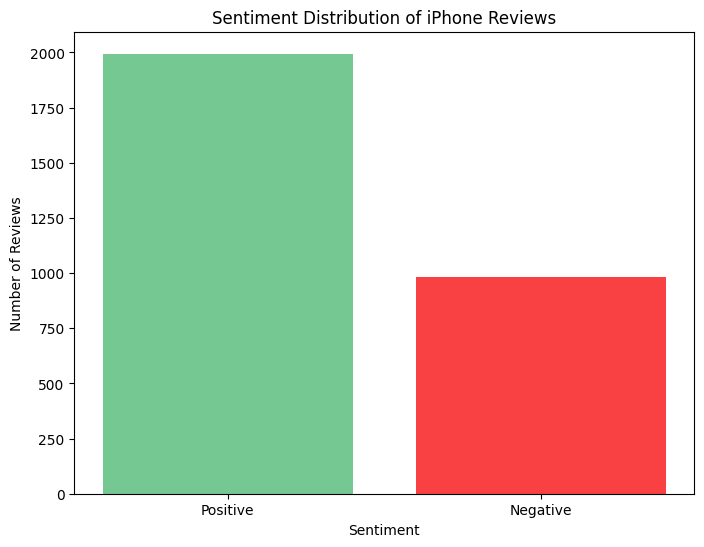

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colours)
plt.title('Sentiment Distribution of iPhone Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

Pie chart

<function matplotlib.pyplot.show(close=None, block=None)>

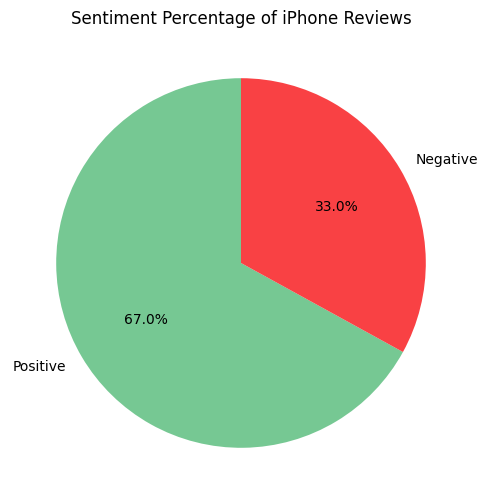

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colours, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Percentage of iPhone Reviews')
plt.show

Additional Visualization: Accuracy by Sentiment

In [ ]:
predicted_sentiments = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
accuracy_by_sentiment = predicted_sentiments.groupby('Actual').apply(
    lambda x: (x['Actual'] == x['Predicted']).mean()
)

<ipython-input-71-edf5726e4e9e>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_sentiment = predicted_sentiments.groupby('Actual').apply(


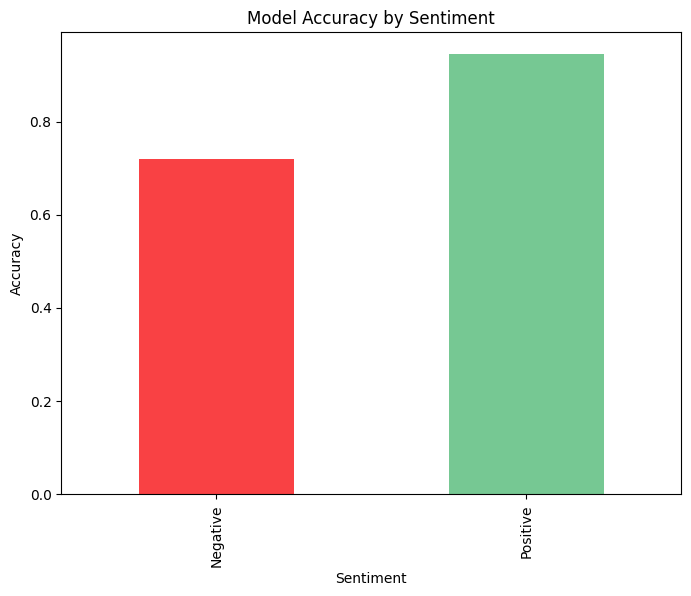

In [ ]:
accuracy_by_sentiment.plot(kind='bar', color=['#f94144', '#76c893'], figsize=(8, 6))
plt.title('Model Accuracy by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Accuracy')
plt.show()